### Therapy Combination tests

#### 1.- Radiotherapy (only)

In [1]:
from sys import path
from os import getcwd
print(getcwd())
path.append("/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Model")


from TumorModel import CellType
from TumorModel import Cell
from TumorModel import Tissue
import numpy as np
import matplotlib.pyplot as plt
from Therapies import Therapy
from Therapies import TherapyType

from IPython.display import clear_output

/Users/walup/Library/CloudStorage/GoogleDrive-walup.legaria@gmail.com/My Drive/Cancer_Immune_Project_Final_Version/Tumor_Immune_System_Simulation/Tests


In [2]:
#I will actually compare a case where no therapy is applied with the radiotherapy
#tumor growth. 
automatonWidth = 100
automatonHeight = 100

tissueNonTherapy = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissueNonTherapy.addProliferatingCell(centerX, centerY)
tissueNonTherapy.addProliferatingCell(centerX + 1, centerY)
tissueNonTherapy.addProliferatingCell(centerX - 1, centerY)
tissueNonTherapy.addProliferatingCell(centerX, centerY + 1)
tissueNonTherapy.addProliferatingCell(centerX, centerY - 1)

tissueNonTherapy.immuneSystem.boundarySpawn = True

nSteps = 300

tissueNonTherapy.evolve(nSteps, False, False, False)


100%|█████████████████████████████████████████| 300/300 [01:26<00:00,  3.46it/s]


In [3]:
#Initialize the automaton
automatonWidth = 100
automatonHeight = 100

tissueRadio = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissueRadio.addProliferatingCell(centerX, centerY)
tissueRadio.addProliferatingCell(centerX + 1, centerY)
tissueRadio.addProliferatingCell(centerX -1, centerY)
tissueRadio.addProliferatingCell(centerX, centerY + 1)
tissueRadio.addProliferatingCell(centerX, centerY - 1)

tissueRadio.immuneSystem.boundarySpawn = True

nSteps = 300

startDay = 50
g0Gamma = 0.2
alpha = 0.1
beta = 0.05
cycleTime = 20
dose = 2.5
thresholdOxygen = 0.9
delayTime = 30
initMitoticProb = 0.6
finalMitoticProb = 0.8
period = 50

radiotherapy = Therapy(TherapyType.RADIOTHERAPY, startDay, g0Gamma, alpha, beta, cycleTime, dose, thresholdOxygen, delayTime, initMitoticProb, finalMitoticProb, period)

tissueRadio.addTherapy(radiotherapy)

tissueRadio.evolve(nSteps,False,False,False)

100%|█████████████████████████████████████████| 300/300 [01:30<00:00,  3.33it/s]


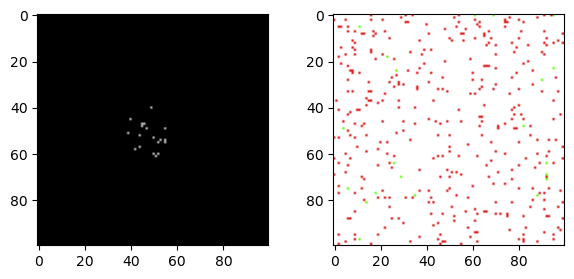

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (7,3))
ax[0].imshow(tissueRadio.getPicture(True))
ax[1].imshow(tissueRadio.immuneSystem.getPicture())

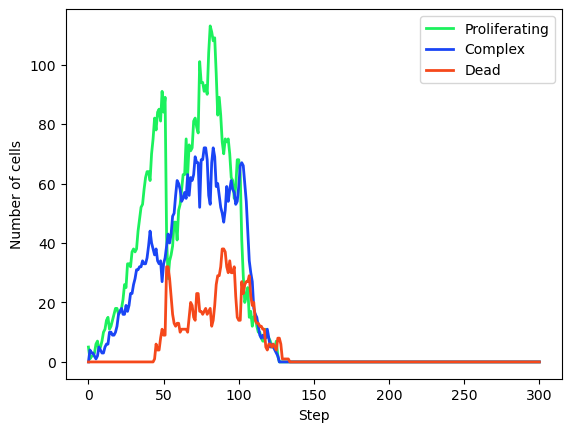

In [5]:
#Evolve the automaton
fig, ax = plt.subplots()
tissueRadio.plotEvolution(ax)

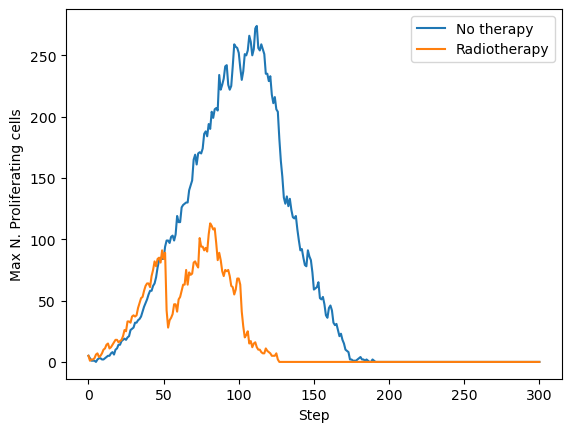

In [6]:
plt.figure()
plt.plot(tissueNonTherapy.cellCountSeries[:,0], label = "No therapy")
plt.plot(tissueRadio.cellCountSeries[:,0],label = "Radiotherapy")
plt.xlabel("Step")
plt.ylabel("Max N. Proliferating cells")
plt.legend()

#### Radiotherapy + inmunosupression

In [7]:
#Initialize the automaton
automatonWidth = 100
automatonHeight = 100

tissueRadioImmuno = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissueRadioImmuno.addProliferatingCell(centerX, centerY)
tissueRadioImmuno.addProliferatingCell(centerX + 1, centerY)
tissueRadioImmuno.addProliferatingCell(centerX -1, centerY)
tissueRadioImmuno.addProliferatingCell(centerX, centerY + 1)
tissueRadioImmuno.addProliferatingCell(centerX, centerY - 1)

tissueRadioImmuno.immuneSystem.boundarySpawn = True

nSteps = 300

startDay = 50
g0Gamma = 0.2
alpha = 0.1
beta = 0.05
cycleTime = 20
dose = 2.5
thresholdOxygen = 0.9
delayTime = 30
initMitoticProb = 0.6
finalMitoticProb = 0.8
period = 50

radiotherapy = Therapy(TherapyType.RADIOTHERAPY, startDay, g0Gamma, alpha, beta, cycleTime, dose, thresholdOxygen, delayTime, initMitoticProb, finalMitoticProb, period)
tissueRadioImmuno.addTherapy(radiotherapy)

startDay = 50

effTCellReduction = 0.5
effRAttack = 0
probDying = 0.5

inmunosuppression = Therapy(TherapyType.IMMUNE_SUPPRESSOR_THERAPY, startDay, effTCellReduction, effRAttack,probDying)
tissueRadioImmuno.addTherapy(inmunosuppression)
tissueRadioImmuno.immuneSystem.activateImmuneDiseaseWithValues(0.99995,0.9)

tissueRadioImmuno.evolve(nSteps,False,False,False)


100%|█████████████████████████████████████████| 300/300 [01:29<00:00,  3.37it/s]


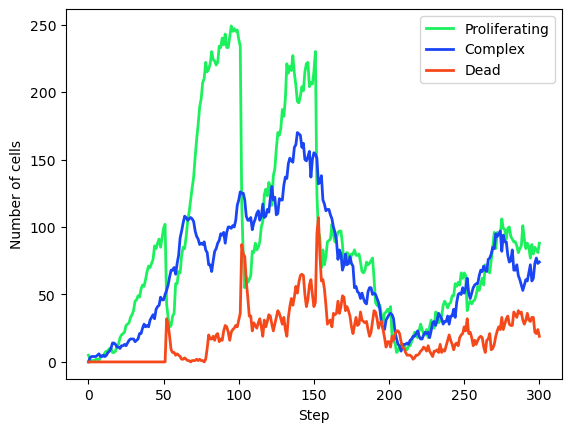

In [8]:
fig, ax = plt.subplots()
tissueRadioImmuno.plotEvolution(ax)

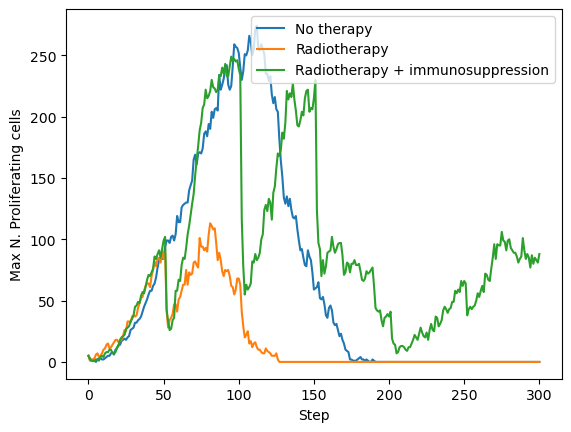

In [9]:
plt.figure()
plt.plot(tissueNonTherapy.cellCountSeries[:,0], label = "No therapy")
plt.plot(tissueRadio.cellCountSeries[:,0],label = "Radiotherapy")
plt.plot(tissueRadioImmuno.cellCountSeries[:,0], label = "Radiotherapy + immunosuppression")
plt.xlabel("Step")
plt.ylabel("Max N. Proliferating cells")
plt.legend()

#### Chemotherapy

In [10]:
#Initialize the automaton
automatonWidth = 100
automatonHeight = 100

tissueChemo = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissueChemo.addProliferatingCell(centerX, centerY)
tissueChemo.addProliferatingCell(centerX + 1, centerY)
tissueChemo.addProliferatingCell(centerX -1, centerY)
tissueChemo.addProliferatingCell(centerX, centerY + 1)
tissueChemo.addProliferatingCell(centerX, centerY - 1)

tissueChemo.immuneSystem.boundarySpawn = True

nSteps = 300

startDay = 50
#Resistencias a tratamiento
treatmentResistances = {}
treatmentResistances[CellType.PROLIFERATING] = 0.05
treatmentResistances[CellType.COMPLEX] = 0.05
treatmentResistances[CellType.DEAD] = 1
treatmentResistances[CellType.NECROTIC] = 1
#Tasas de muerte
killRates = {}
killRates[CellType.PROLIFERATING] = 0.9
killRates[CellType.COMPLEX] = 0
killRates[CellType.DEAD] = 0
killRates[CellType.NECROTIC] = 0
#Coeficientes de atenuación (no se que son así que los haré igual a 0.5 todos)
attenuationCoefficients = {}
attenuationCoefficients[CellType.PROLIFERATING] = 0.5
attenuationCoefficients[CellType.COMPLEX] = 0.5
attenuationCoefficients[CellType.DEAD] = 0
attenuationCoefficients[CellType.NECROTIC] = 0
#Pasos de tratamiento
treatmentSteps = nSteps - startDay
#Constante de tiempo 
tau = 1
#Factor de farmacodinámica 
PK = 1
widthAreaTreatment = automatonWidth
heightAreaTreatment = automatonHeight
initialMedConcentration = 2
resistanceCellsRatio = 0.05
medAbsorptionCells = 0
medDifussionConstant = 0.35
applicationSteps = 100

chemoTherapy = Therapy(TherapyType.CHEMOTHERAPY, startDay, treatmentResistances, killRates, attenuationCoefficients, treatmentSteps, tau, PK, widthAreaTreatment, heightAreaTreatment, initialMedConcentration, resistanceCellsRatio, medAbsorptionCells, medDifussionConstant, applicationSteps)


tissueChemo.addTherapy(chemoTherapy)

tissueChemo.evolve(nSteps,False,False,False)

100%|█████████████████████████████████████████| 300/300 [01:37<00:00,  3.06it/s]


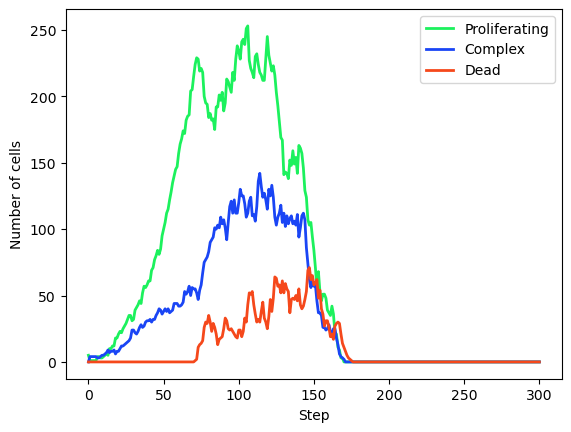

In [11]:
fig, ax = plt.subplots()
tissueChemo.plotEvolution(ax)

In [12]:
automatonWidth = 100
automatonHeight = 100

tissueChemoImmuno = Tissue(automatonWidth, automatonHeight)

centerX = int(automatonWidth/2)
centerY = int(automatonHeight/2)

tissueChemoImmuno.addProliferatingCell(centerX, centerY)
tissueChemoImmuno.addProliferatingCell(centerX + 1, centerY)
tissueChemoImmuno.addProliferatingCell(centerX -1, centerY)
tissueChemoImmuno.addProliferatingCell(centerX, centerY + 1)
tissueChemoImmuno.addProliferatingCell(centerX, centerY - 1)

tissueChemoImmuno.immuneSystem.boundarySpawn = True

nSteps = 300

startDay = 50
#Resistencias a tratamiento
treatmentResistances = {}
treatmentResistances[CellType.PROLIFERATING] = 0.05
treatmentResistances[CellType.COMPLEX] = 0.05
treatmentResistances[CellType.DEAD] = 1
treatmentResistances[CellType.NECROTIC] = 1
#Tasas de muerte
killRates = {}
killRates[CellType.PROLIFERATING] = 0.9
killRates[CellType.COMPLEX] = 0
killRates[CellType.DEAD] = 0
killRates[CellType.NECROTIC] = 0
#Coeficientes de atenuación (no se que son así que los haré igual a 0.5 todos)
attenuationCoefficients = {}
attenuationCoefficients[CellType.PROLIFERATING] = 0.5
attenuationCoefficients[CellType.COMPLEX] = 0.15
attenuationCoefficients[CellType.DEAD] = 0
attenuationCoefficients[CellType.NECROTIC] = 0
#Pasos de tratamiento
treatmentSteps = nSteps - startDay
#Constante de tiempo 
tau = 1
#Factor de farmacodinámica 
PK = 1
widthAreaTreatment = automatonWidth
heightAreaTreatment = automatonHeight
initialMedConcentration = 2
resistanceCellsRatio = 0.05
medAbsorptionCells = 0
medDifussionConstant = 0.35
applicationSteps = 100

chemoTherapy = Therapy(TherapyType.CHEMOTHERAPY, startDay, treatmentResistances, killRates, attenuationCoefficients, treatmentSteps, tau, PK, widthAreaTreatment, heightAreaTreatment, initialMedConcentration, resistanceCellsRatio, medAbsorptionCells, medDifussionConstant, applicationSteps)


tissueChemoImmuno.addTherapy(chemoTherapy)

startDay = 50

effTCellReduction = 0.5
effRAttack = 0
probDying = 0.5

inmunosuppression = Therapy(TherapyType.IMMUNE_SUPPRESSOR_THERAPY, startDay, effTCellReduction, effRAttack,probDying)
tissueChemoImmuno.addTherapy(inmunosuppression)
tissueChemoImmuno.immuneSystem.activateImmuneDiseaseWithValues(0.99995,0.9)

tissueChemoImmuno.evolve(nSteps,False,False,False)

100%|█████████████████████████████████████████| 300/300 [01:34<00:00,  3.17it/s]


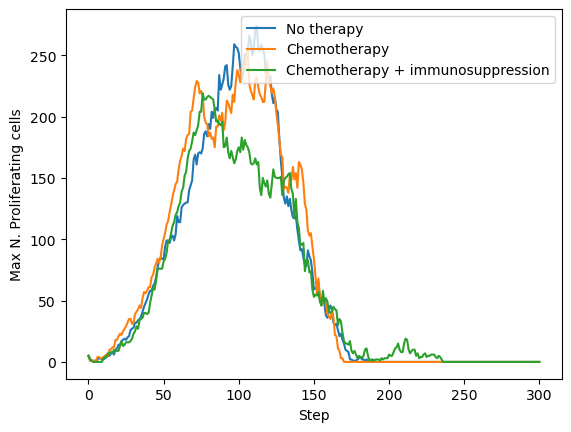

In [13]:
plt.figure()
plt.plot(tissueNonTherapy.cellCountSeries[:,0], label = "No therapy")
plt.plot(tissueChemo.cellCountSeries[:,0],label = "Chemotherapy")
plt.plot(tissueChemoImmuno.cellCountSeries[:,0], label = "Chemotherapy + immunosuppression")
plt.xlabel("Step")
plt.ylabel("Max N. Proliferating cells")
plt.legend()